Policy derived from SARSA:
T ← ← → T
↑ ↑ ↑ ↑ ↑
R R ↑ R R
→ → ↑ ← ↓
S → ↑ ← ←

Policy derived from Q-Learning:
T ← → → T
↑ ↑ ↑ ↑ ↑
R R ↑ R R
→ → ↑ ← ←
S ↑ ↑ ← ↑


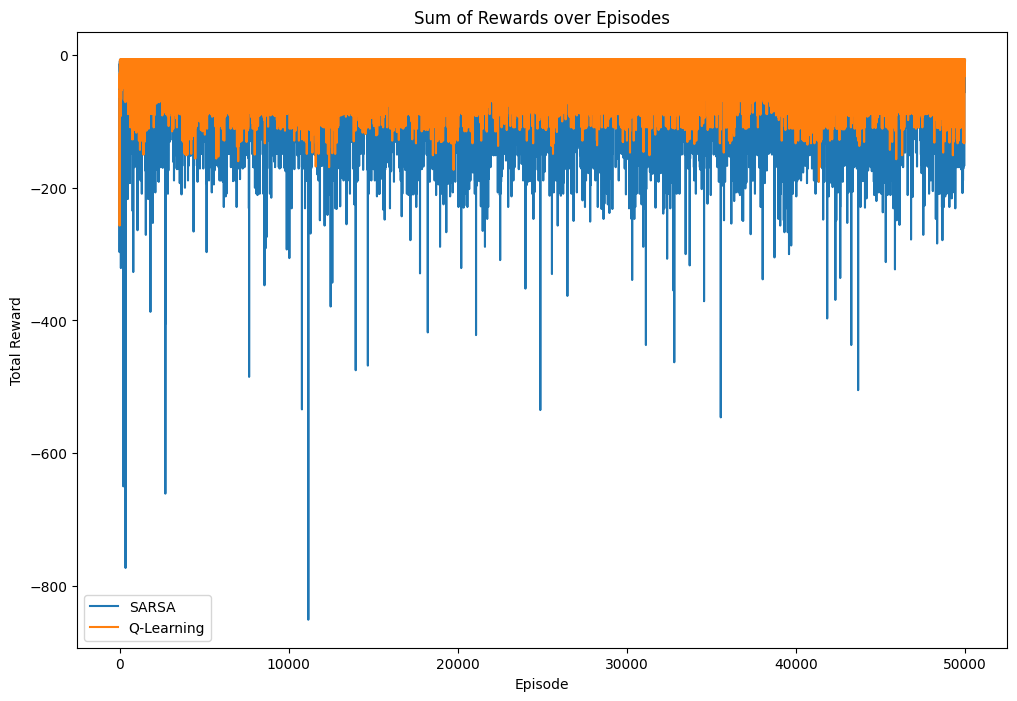

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the grid world environment
class GridWorld:
    def __init__(self):
        # Initialize a 5x5 grid world with start state, terminal states, and red states
        self.grid = np.zeros((5, 5))
        self.start_state = (4, 0)  # Starting position at the bottom-left corner
        self.terminal_states = [(0, 0), (0, 4)]  # Terminal states with no rewards
        self.red_states = [(2, 0), (2, 1), (2, 3), (2,4)]  # Red states with a large negative reward
        self.state = self.start_state  # Current state of the agent
        self.actions = [0, 1, 2, 3]  # Possible actions: 0=up, 1=right, 2=down, 3=left

    def reset(self):
        # Reset the environment to the start state
        self.state = self.start_state
        return self.state

    def step(self, action):
        # Apply the action and return the next state, reward, and done status
        row, col = self.state
        if action == 0:  # up
            row -= 1
        elif action == 1:  # right
            col += 1
        elif action == 2:  # down
            row += 1
        elif action == 3:  # left
            col -= 1

        # Check if the next state is a terminal state
        if (row, col) in self.terminal_states:
            return (row, col), 0, True
        # Check if the next state is a red state
        elif (row, col) in self.red_states:
            return self.start_state, -20, False
        # Check if the next state is out of bounds
        elif row < 0 or row >= 5 or col < 0 or col >= 5:
            return self.state, -1, False
        # Otherwise, update to the new state
        else:
            self.state = (row, col)
            return self.state, -1, False

def epsilon_greedy_action(Q, state, epsilon=0.1):
    # Select an action using epsilon-greedy policy
    if np.random.rand() < epsilon:
        # With probability epsilon, select a random action (exploration)
        return np.random.choice([0, 1, 2, 3])
    else:
        # Otherwise, select the action with the highest Q-value (exploitation)
        return np.argmax(Q[state])

def sarsa(env, num_episodes, alpha=0.1, gamma=0.99, epsilon=0.1):
    # Initialize the Q-table with zeros using a defaultdict
    Q = defaultdict(lambda: np.zeros(len(env.actions)))
    episode_rewards = []  # List to store the total reward per episode
    for _ in range(num_episodes):
        state = env.reset()  # Reset the environment for each episode
        action = epsilon_greedy_action(Q, state, epsilon)  # Select an initial action
        total_reward = 0  # Initialize the total reward for this episode
        while True:
            next_state, reward, done = env.step(action)  # Take the action and observe the outcome
            next_action = epsilon_greedy_action(Q, next_state, epsilon)  # Select the next action
            # Update the Q-value using the SARSA update rule
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state, action = next_state, next_action  # Move to the next state-action pair
            total_reward += reward  # Accumulate the reward
            if done:
                break  # End the episode if a terminal state is reached
        episode_rewards.append(total_reward)  # Store the total reward for this episode
    return Q, episode_rewards

def q_learning(env, num_episodes, alpha=0.1, gamma=0.99, epsilon=0.1):
    # Initialize the Q-table with zeros using a defaultdict
    Q = defaultdict(lambda: np.zeros(len(env.actions)))
    episode_rewards = []  # List to store the total reward per episode
    for _ in range(num_episodes):
        state = env.reset()  # Reset the environment for each episode
        total_reward = 0  # Initialize the total reward for this episode
        while True:
            action = epsilon_greedy_action(Q, state, epsilon)  # Select an action
            next_state, reward, done = env.step(action)  # Take the action and observe the outcome
            best_next_action = np.argmax(Q[next_state])  # Find the best action at the next state
            # Update the Q-value using the Q-Learning update rule
            Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])
            state = next_state  # Move to the next state
            total_reward += reward  # Accumulate the reward
            if done:
                break  # End the episode if a terminal state is reached
        episode_rewards.append(total_reward)  # Store the total reward for this episode
    return Q, episode_rewards

def plot_policy(env, Q):
    # Create a 5x5 grid to display the policy
    policy_grid = np.full((5, 5), ' ')
    actions = ['↑', '→', '↓', '←']  # Symbols to represent actions
    for i in range(5):
        for j in range(5):
            if (i, j) in env.terminal_states:
                policy_grid[i, j] = 'T'  # Mark terminal states with 'T'
            elif (i, j) in env.red_states:
                policy_grid[i, j] = 'R'  # Mark red states with 'R'
            elif (i, j) == env.start_state:
                policy_grid[i, j] = 'S'  # Mark the start state with 'S'
            else:
                action = np.argmax(Q[(i, j)])  # Get the best action for this state
                policy_grid[i, j] = actions[action]  # Mark the grid with the action symbol
    for row in policy_grid:
        print(' '.join(row))  # Print the policy grid

def plot_rewards(sarsa_rewards, q_learning_rewards):
    # Plot the sum of rewards over episodes for SARSA and Q-Learning
    plt.figure(figsize=(12, 8))
    plt.plot(sarsa_rewards, label='SARSA')
    plt.plot(q_learning_rewards, label='Q-Learning')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Sum of Rewards over Episodes')
    plt.legend()
    plt.show()

# Initialize the GridWorld environment
env = GridWorld()
num_episodes = 50000  # Number of episodes to run

# Run SARSA and Q-Learning algorithms
Q_sarsa, sarsa_rewards = sarsa(env, num_episodes)
Q_q_learning, q_learning_rewards = q_learning(env, num_episodes)

# Display the derived policies
print("Policy derived from SARSA:")
plot_policy(env, Q_sarsa)
print("\nPolicy derived from Q-Learning:")
plot_policy(env, Q_q_learning)

# Plot the sum of rewards over episodes for both methods
plot_rewards(sarsa_rewards, q_learning_rewards)
